## **아래 코드를 실행시키고 문제에 답하시오.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 문제1 - 10점

* 수학, 영어 점수의 평균을 구하고, 점수가 높은 순서대로 정렬한 후 결과값으로 **점수가 높은 5명의 점수를 출력**하세요.

* 리스트 순서대로 학생 한 명의 점수입니다.
* hint: for문 사용

# 문제2 -15점

* 다음은 2022년 7월 26일 오후 2시 기준, 원화 환율입니다.
  (미국:1309.70$, 유럽연합:1339.30€, 중국:193.84¥, 영국:1579.96£)
* 환전하려는 금액을 입력 받고, 나라를 입력 받아서 환율을 **소수점 2자리**로 출력하세요.
* Hint: 환전 금액과 나라 입력 시 input 함수를, 국가별 환율 계산에는 조건문을 사용하세요.

<답안 예시>

환전 금액(원화):8000

국가 선택(미국/유럽연합/중국/영국):미국

6.11


In [63]:
x = int(input("환전 금액(원화):"))

country = str(input("국가 선택(미국/유럽연합/중국/영국):"))

while country not in (["미국", "유럽연합", "중국", "영국"]):
    country = str(input("잘못입력하셨습니다. 다시 입력하세요 :"))

country_dict = {}
country_dict['미국'] = 1309.70
country_dict['유럽연합'] = 1339.30
country_dict['중국'] = 193.84
country_dict['영국'] = 1579.96

currency = x / country_dict[country]

print(f"{currency:.2f}")


6.11


# 문제3 - 25점

### 문제 [3-1] - 3점

midwest.csv를 불러와 midwest에 저장하고, 위에서부터 10행까지 출력하시오.

In [46]:
import sys, os
sys.path.append("..")

midwest = pd.read_csv("midwest.csv")
print(midwest.head(10))

   PID     county state   area  poptotal   popdensity  popwhite  popblack  \
0  561      ADAMS    IL  0.052     66090  1270.961540     63917      1702   
1  562  ALEXANDER    IL  0.014     10626   759.000000      7054      3496   
2  563       BOND    IL  0.022     14991   681.409091     14477       429   
3  564      BOONE    IL  0.017     30806  1812.117650     29344       127   
4  565      BROWN    IL  0.018      5836   324.222222      5264       547   
5  566     BUREAU    IL  0.050     35688   713.760000     35157        50   
6  567    CALHOUN    IL  0.017      5322   313.058824      5298         1   
7  568    CARROLL    IL  0.027     16805   622.407407     16519       111   
8  569       CASS    IL  0.024     13437   559.875000     13384        16   
9  570  CHAMPAIGN    IL  0.058    173025  2983.189660    146506     16559   

   popamerindian  popasian  ...  percollege   percprof  poppovertyknown  \
0             98       249  ...   19.631392   4.355859            63628   
1 

### 문제 [3-2] - 7점

* popwhite는 해당 지역의 아시아인 인구, poptotal은 해당 지역의 전체 인구를 나타냅니다.

* midwest 데이터에 '전체 인구 대비 아시아인 인구 백분율' 변수인 percent 열을 추가하세요.

In [47]:
midwest['percent'] = midwest['popwhite'] / midwest['poptotal'] * 100

print(midwest['percent'])

0      96.712059
1      66.384340
2      96.571276
3      95.254171
4      90.198766
         ...    
432    97.899020
433    99.112875
434    98.498839
435    97.507127
436    98.032742
Name: percent, Length: 437, dtype: float64


### 문제 [3-3] - 3점

* percent 열의 값을 내림차순으로 정렬하세요.

In [48]:
midwest = midwest.sort_values('percent', ascending=False)

print(midwest['percent'])

85     99.822821
358    99.756713
84     99.746599
73     99.742732
389    99.717122
         ...    
76     66.888209
1      66.384340
15     62.779725
275    57.395201
404    10.694087
Name: percent, Length: 437, dtype: float64


### 문제 [3-4] - 6점

* percent를 아래의 분류 기준에 따라 새로운 변수를 추가해주시고, 각 분류에 해당하는 지역이 몇 개인지 확인해보시오.

* large: 0.9% 이상 / middle: 0.4~0.9% 미만 / small: 0.4% 미만

In [51]:
midwest['percent_types'] = 'None'

# print(midwest.head())

midwest.loc[midwest['percent'] >= 90, 'percent_types'] = 'large'
midwest.loc[(midwest['percent'] >= 40) & (midwest['percent'] < 90), 'percent_types'] = 'middle'
midwest.loc[(midwest['percent'] < 40), 'percent_types'] = 'small'

# print(midwest.head())
print(midwest['percent_types'].value_counts())

percent_types
large     388
middle     48
small       1
Name: count, dtype: int64


### 문제 [3-5] - 6점

* county가 'SCOTT'인 경우와 county가 'PIATT'인 경우의 poptotal 열의 평균을 각각 구해서 출력하세요.

* hint: query 함수와 mean 함수 사용

In [58]:
# print(midwest.head())

# print(midwest['county'].value_counts())
midwest_scott = midwest.loc[midwest['county'] == 'SCOTT', 'poptotal']
midwest_PIATT = midwest.loc[midwest['county'] == 'PIATT', 'poptotal']

print(midwest_scott)
print(midwest_PIATT)


print(f"midwest_scott mean : {np.mean(midwest_scott)}")

print(f"midwest_PIATT : {np.mean(midwest_PIATT)}")


85      5644
173    20991
Name: poptotal, dtype: int64
73    15548
Name: poptotal, dtype: int64
midwest_scott mean : 13317.5
midwest_PIATT : 15548.0


# 문제4 - 50점

다음 데이터를 사용하여 각 문항에 답하세요.

In [85]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 문제 [4-1] - 8점

titanic에서 열별 결측치 여부를 확인하고, 결측치가 존재한다면 결측치를 해당 열의 평균값으로 채우세요.

In [86]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [87]:
print(titanic['embarked'].value_counts())
print(titanic['deck'].value_counts())
print(titanic['embark_town'].value_counts())

embarked
S    644
C    168
Q     77
Name: count, dtype: int64
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64
embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64


In [88]:
titanic_age_mean = np.mean(titanic['age'])
titanic['age'] = titanic['age'].fillna(titanic_age_mean)

# titanic_embarked_dict = dict(titanic['embarked'].value_counts())
# titanic['embarked'] = titanic['embarked'].fillna('S')

# titanic_deck_dict = dict(titanic['deck'].value_counts())
# titanic['deck'] = titanic['deck'].fillna('C')

# titanic_embark_town_dict = dict(titanic['embark_town'].value_counts())
# titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


### 문제 [4-2] - 점수 7점
titanic의 각 열에서 결측치가 아닌 데이터가 250개 이상이 되지 않는 경우, 이 열을 삭제한 후 df에 저장하세요.

In [90]:
drop_features = ['embarked', 'deck', 'embark_town']

titanic = titanic.drop(drop_features, axis= 1)

print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   class       891 non-null    category
 8   who         891 non-null    object  
 9   adult_male  891 non-null    bool    
 10  alive       891 non-null    object  
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB
None


### 문제 [4-3] - 5점

* 수치형 데이터의 열별 분포를 간략히 요약해 나타내세요.

* 평균, 최댓값, 사분위수 등

In [93]:
float_features = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

def summary_feat(df:pd.DataFrame, col:str):
    mean = np.mean(df[col])
    maximum = np.max(df[col])
    minimum = np.min(df[col])
    median = np.median(df[col])
    quantile_1 = np.quantile(df[col], 0.25)
    quantile_3 = np.quantile(df[col], 0.75)

    return mean, maximum, minimum, median, quantile_1, quantile_3

for item in float_features:
    mean, maximum, minimum, median, quantile_1, quantile_3 = summary_feat(titanic, item)
    print(f"칼럼명 : {item}, 평균 : {mean}, 최댓값 : {maximum}, 최솟값 : {minimum}, 중간값 : {median}, Q1 : {quantile_1}, Q3 : {quantile_3}")

칼럼명 : survived, 평균 : 0.3838383838383838, 최댓값 : 1, 최솟값 : 0, 중간값 : 0.0, Q1 : 0.0, Q3 : 1.0
칼럼명 : pclass, 평균 : 2.308641975308642, 최댓값 : 3, 최솟값 : 1, 중간값 : 3.0, Q1 : 2.0, Q3 : 3.0
칼럼명 : age, 평균 : 29.69911764705882, 최댓값 : 80.0, 최솟값 : 0.42, 중간값 : 29.69911764705882, Q1 : 22.0, Q3 : 35.0
칼럼명 : sibsp, 평균 : 0.5230078563411896, 최댓값 : 8, 최솟값 : 0, 중간값 : 0.0, Q1 : 0.0, Q3 : 1.0
칼럼명 : parch, 평균 : 0.38159371492704824, 최댓값 : 6, 최솟값 : 0, 중간값 : 0.0, Q1 : 0.0, Q3 : 0.0
칼럼명 : fare, 평균 : 32.204207968574636, 최댓값 : 512.3292, 최솟값 : 0.0, 중간값 : 14.4542, Q1 : 7.9104, Q3 : 31.0


### 문제 [4-4] - 6점

titanic에서 sex와 pclass 별 생존율을 구하세요.

In [103]:
## sex 별 생존율

def survive_rate(df:pd.DataFrame, col:str):
    X = df[col].unique()
    vals_dict = {}
    for x in X:
        temp_val = None
        temp_val = titanic.loc[titanic[col] == x, 'survived']
        x_mean = np.mean(temp_val * 100)
        vals_dict[f'{col}_{x}_survive_rate'] = x_mean
    
    return vals_dict
    
sex_survive = survive_rate(titanic, 'sex')
print(sex_survive)
pclass_survive = survive_rate(titanic, 'pclass')
print(pclass_survive)
# print(titanic_male_survive_rate)

{'sex_male_survive_rate': 18.890814558058924, 'sex_female_survive_rate': 74.20382165605096}
{'pclass_3_survive_rate': 24.236252545824847, 'pclass_1_survive_rate': 62.96296296296296, 'pclass_2_survive_rate': 47.28260869565217}


### 문제 [4-5] - 8점

* pclass 별 사망과 생존 수치를 막대그래프로 나타내세요.

* sex 별 사망과 생존 수치를 막대그래프로 나타내세요.

* hint: countplot 함수 사용

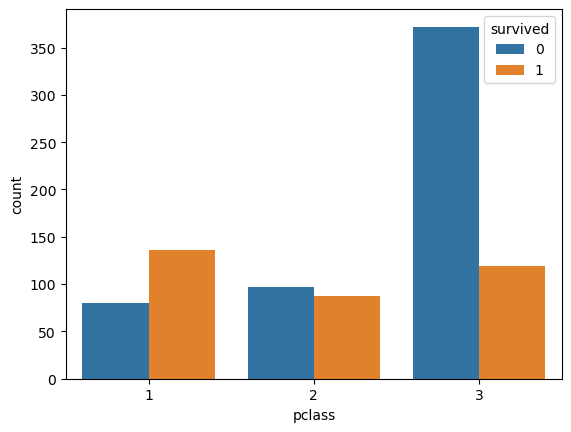

In [110]:
import seaborn as sns

titanic['survived'] = titanic['survived'].astype(str)
ax = sns.countplot(x = "pclass", hue = "survived", data = titanic)

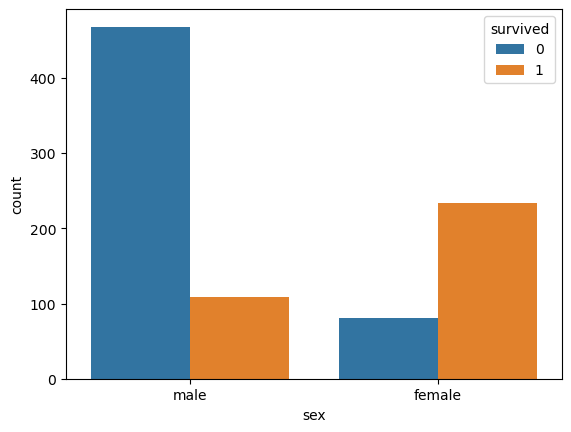

In [111]:
titanic['survived'] = titanic['survived'].astype(str)
ax = sns.countplot(x = "sex", hue = "survived", data = titanic)

### 문제 [4-6] - 8점

* titanic에서 age가 20살 이상이면 adult로, 20살 미만이면 child로 나타내는 label열을 추가하세요.

* hint: apply, lambda 함수 사용

In [ ]:
midwest['percent_types'] = 'None'

# print(midwest.head())

midwest.loc[midwest['percent'] >= 90, 'percent_types'] = 'large'
midwest.loc[(midwest['percent'] >= 40) & (midwest['percent'] < 90), 'percent_types'] = 'middle'
midwest.loc[(midwest['percent'] < 40), 'percent_types'] = 'small'

# print(midwest.head())
print(midwest['percent_types'].value_counts())

In [128]:
titanic['label'] = None

titanic.loc[titanic['age'] >= 20, 'label'] = 'adult'
titanic.loc[titanic['age'] < 20, 'label'] = 'child'

# titanic['label'] = titanic['label'].apply(lambda x: 'adult')


print(titanic.head())
print(titanic['label'].value_counts())

  survived  pclass     sex   age  sibsp  parch     fare  class    who  \
0        0       3    male  22.0      1      0   7.2500  Third    man   
1        1       1  female  38.0      1      0  71.2833  First  woman   
2        1       3  female  26.0      0      0   7.9250  Third  woman   
3        1       1  female  35.0      1      0  53.1000  First  woman   
4        0       3    male  35.0      0      0   8.0500  Third    man   

   adult_male alive  alone  label  
0        True    no  False  adult  
1       False   yes  False  adult  
2       False   yes   True  adult  
3       False   yes  False  adult  
4        True    no   True  adult  
label
adult    727
child    164
Name: count, dtype: int64


### 문제 [4-7] - 8점

* titanic에서 pclass, sex, age, sibsp, parch, class 열만 뽑은 후, parch의 값이 0인 행만 titanic1에 저장하세요.

* 이때 새롭게 만들어진 titanic1의 index는 0부터 다시 시작하도록 하세요.

* hint: loc 함수 사용

In [135]:
some_cols = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'class']

titanic1 = pd.DataFrame(titanic[some_cols])

titanic1 = titanic1[(titanic1['parch'] == 0)]

print(titanic1)

     pclass     sex   age  sibsp  parch   class
0         3    male  22.0      1      0   Third
1         1  female  38.0      1      0   First
2         3  female  26.0      0      0   Third
3         1  female  35.0      1      0   First
4         3    male  35.0      0      0   Third
..      ...     ...   ...    ...    ...     ...
884       3    male  25.0      0      0   Third
886       2    male  27.0      0      0  Second
887       1  female  19.0      0      0   First
889       1    male  26.0      0      0   First
890       3    male  32.0      0      0   Third

[678 rows x 6 columns]


# END

## 수고하셨습니다:) 좋은 결과 있기를 바라며, 코딩테스트는 절대적 평가 기준이 아닙니다.